#Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#Load Dataset

In [ ]:
# Memuat dataset
data = pd.read_csv('padi.csv')

# Tampilkan 5 data teratas
data.head()

,Provinsi,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
0,Aceh,1993,1329536.0,323589.0,1627.0,82.00,26.06
1,Aceh,1994,1299699.0,329041.0,1521.0,82.12,26.92
2,Aceh,1995,1382905.0,339253.0,1476.0,82.72,26.27
3,Aceh,1996,1419128.0,348223.0,1557.0,83.00,26.08
4,Aceh,1997,1368074.0,337561.0,1339.0,82.46,26.31


#Explore the dataset

In [ ]:
# Check data types and non-null values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provinsi        224 non-null    object 
 1   Tahun           224 non-null    int64  
 2   Produksi        224 non-null    float64
 3   Luas Panen      224 non-null    float64
 4   Curah hujan     224 non-null    float64
 5   Kelembapan      224 non-null    float64
 6   Suhu rata-rata  224 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.4+ KB
None


In [ ]:
# Summary statistics of the dataset
data.describe()

,Tahun,Produksi,Luas Panen,Curah hujan,Kelembapan,Suhu rata-rata
count,224.000000,2.240000e+02,224.000000,224.000000,224.000000,224.000000
mean,2006.500000,1.679701e+06,374349.966920,2452.490759,80.948705,26.801964
std,8.095838,1.161387e+06,232751.161987,1031.972625,4.878680,1.197041
min,1993.000000,4.293800e+04,63142.040000,222.500000,54.200000,22.190000
25%,1999.750000,5.488570e+05,146919.500000,1703.525000,78.975000,26.177500
50%,2006.500000,1.667773e+06,373551.500000,2315.700000,82.375000,26.730000
75%,2013.250000,2.436851e+06,514570.250000,3039.700000,84.000000,27.200000
max,2020.000000,4.881089e+06,872737.000000,5522.000000,90.600000,29.850000


In [ ]:
# Check for missing values
print(data.isnull().sum())

Provinsi          0
Tahun             0
Produksi          0
Luas Panen        0
Curah hujan       0
Kelembapan        0
Suhu rata-rata    0
dtype: int64


In [ ]:
# Check for duplicate data
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


##Visualize relationships and distribution

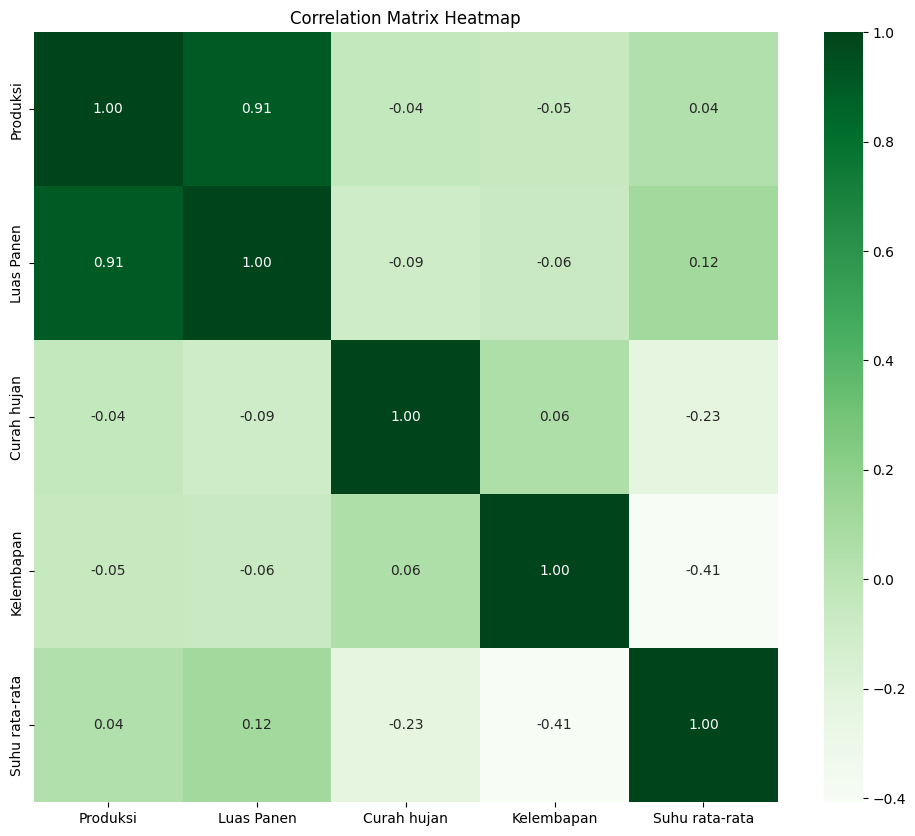

In [ ]:
# Plot heatmap to observe correlations between variables
data = data.drop(['Tahun', 'Provinsi'], axis=1)
correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

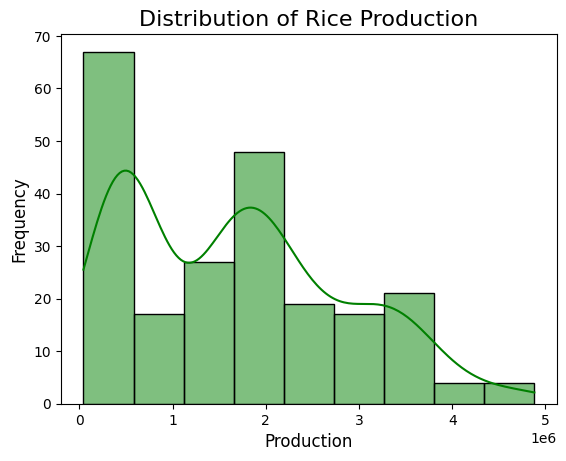

In [ ]:
# Check the distribution of the target variable (Production)
sns.histplot(data['Produksi'], kde=True, color='green')
plt.title('Distribution of Rice Production', fontsize=16)
plt.xlabel('Production', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

#Prepare data for regression

In [ ]:
# Select independent variables and the target variable
X = data[['Curah hujan', 'Kelembapan', 'Suhu rata-rata', 'Luas Panen']]
y = data['Produksi']

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a multiple linear regression model

In [ ]:
model = LinearRegression()  # Initialize the linear regression model
model.fit(X_train, y_train)  # Train the model on the training dataset

LinearRegression()

In [ ]:
# Display model coefficients (weights) and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [ 2.38439554e+01 -3.67718485e+03 -5.74587933e+04  4.57805366e+00]
Model Intercept: 1767355.9068948526


#Evaluate the model

In [ ]:
# Predict on the test dataset
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 115079741001.89542
R-squared (R2): 0.8698382149351547


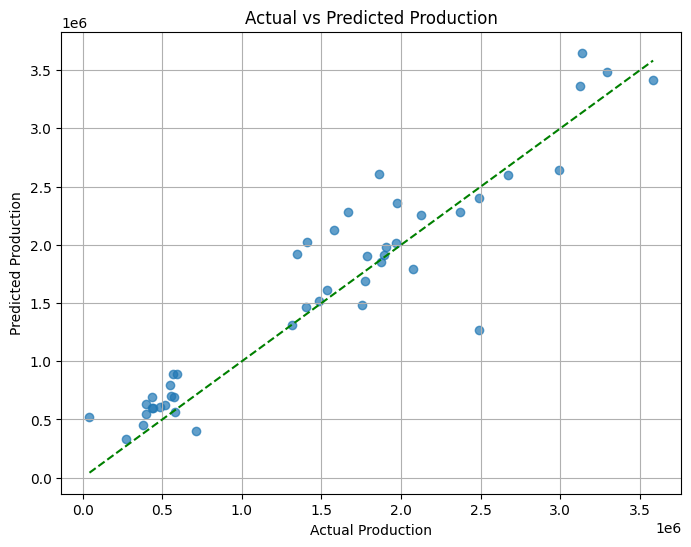

In [ ]:
# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='green')
plt.title("Actual vs Predicted Production")
plt.xlabel("Actual Production")
plt.ylabel("Predicted Production")
plt.grid(True)
plt.show()